In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import tejapi
import pandas as pd
import numpy as np
tejapi.ApiConfig.api_key = "BYAxGg825SxMGvvkTsi6vMPcu1zT6p"
tejapi.ApiConfig.api_base = "http://10.10.10.66"
data_use = tejapi.get('TWN/ANAV', coid = '0050', mdate={'gte':'2000-01-01', 'lte':'2025-06-09'})
data = data_use.copy()
data['mdate'] = pd.to_datetime(data['mdate'])  # 保險起見，先確保是 datetime 格式
data['mdate'] = data['mdate'].dt.strftime('%Y-%m-%d')  # 轉成你要的字串格式
data['mdate'] = pd.to_datetime(data['mdate']) 
data.to_csv(f'0050_Net_VALUE.csv')

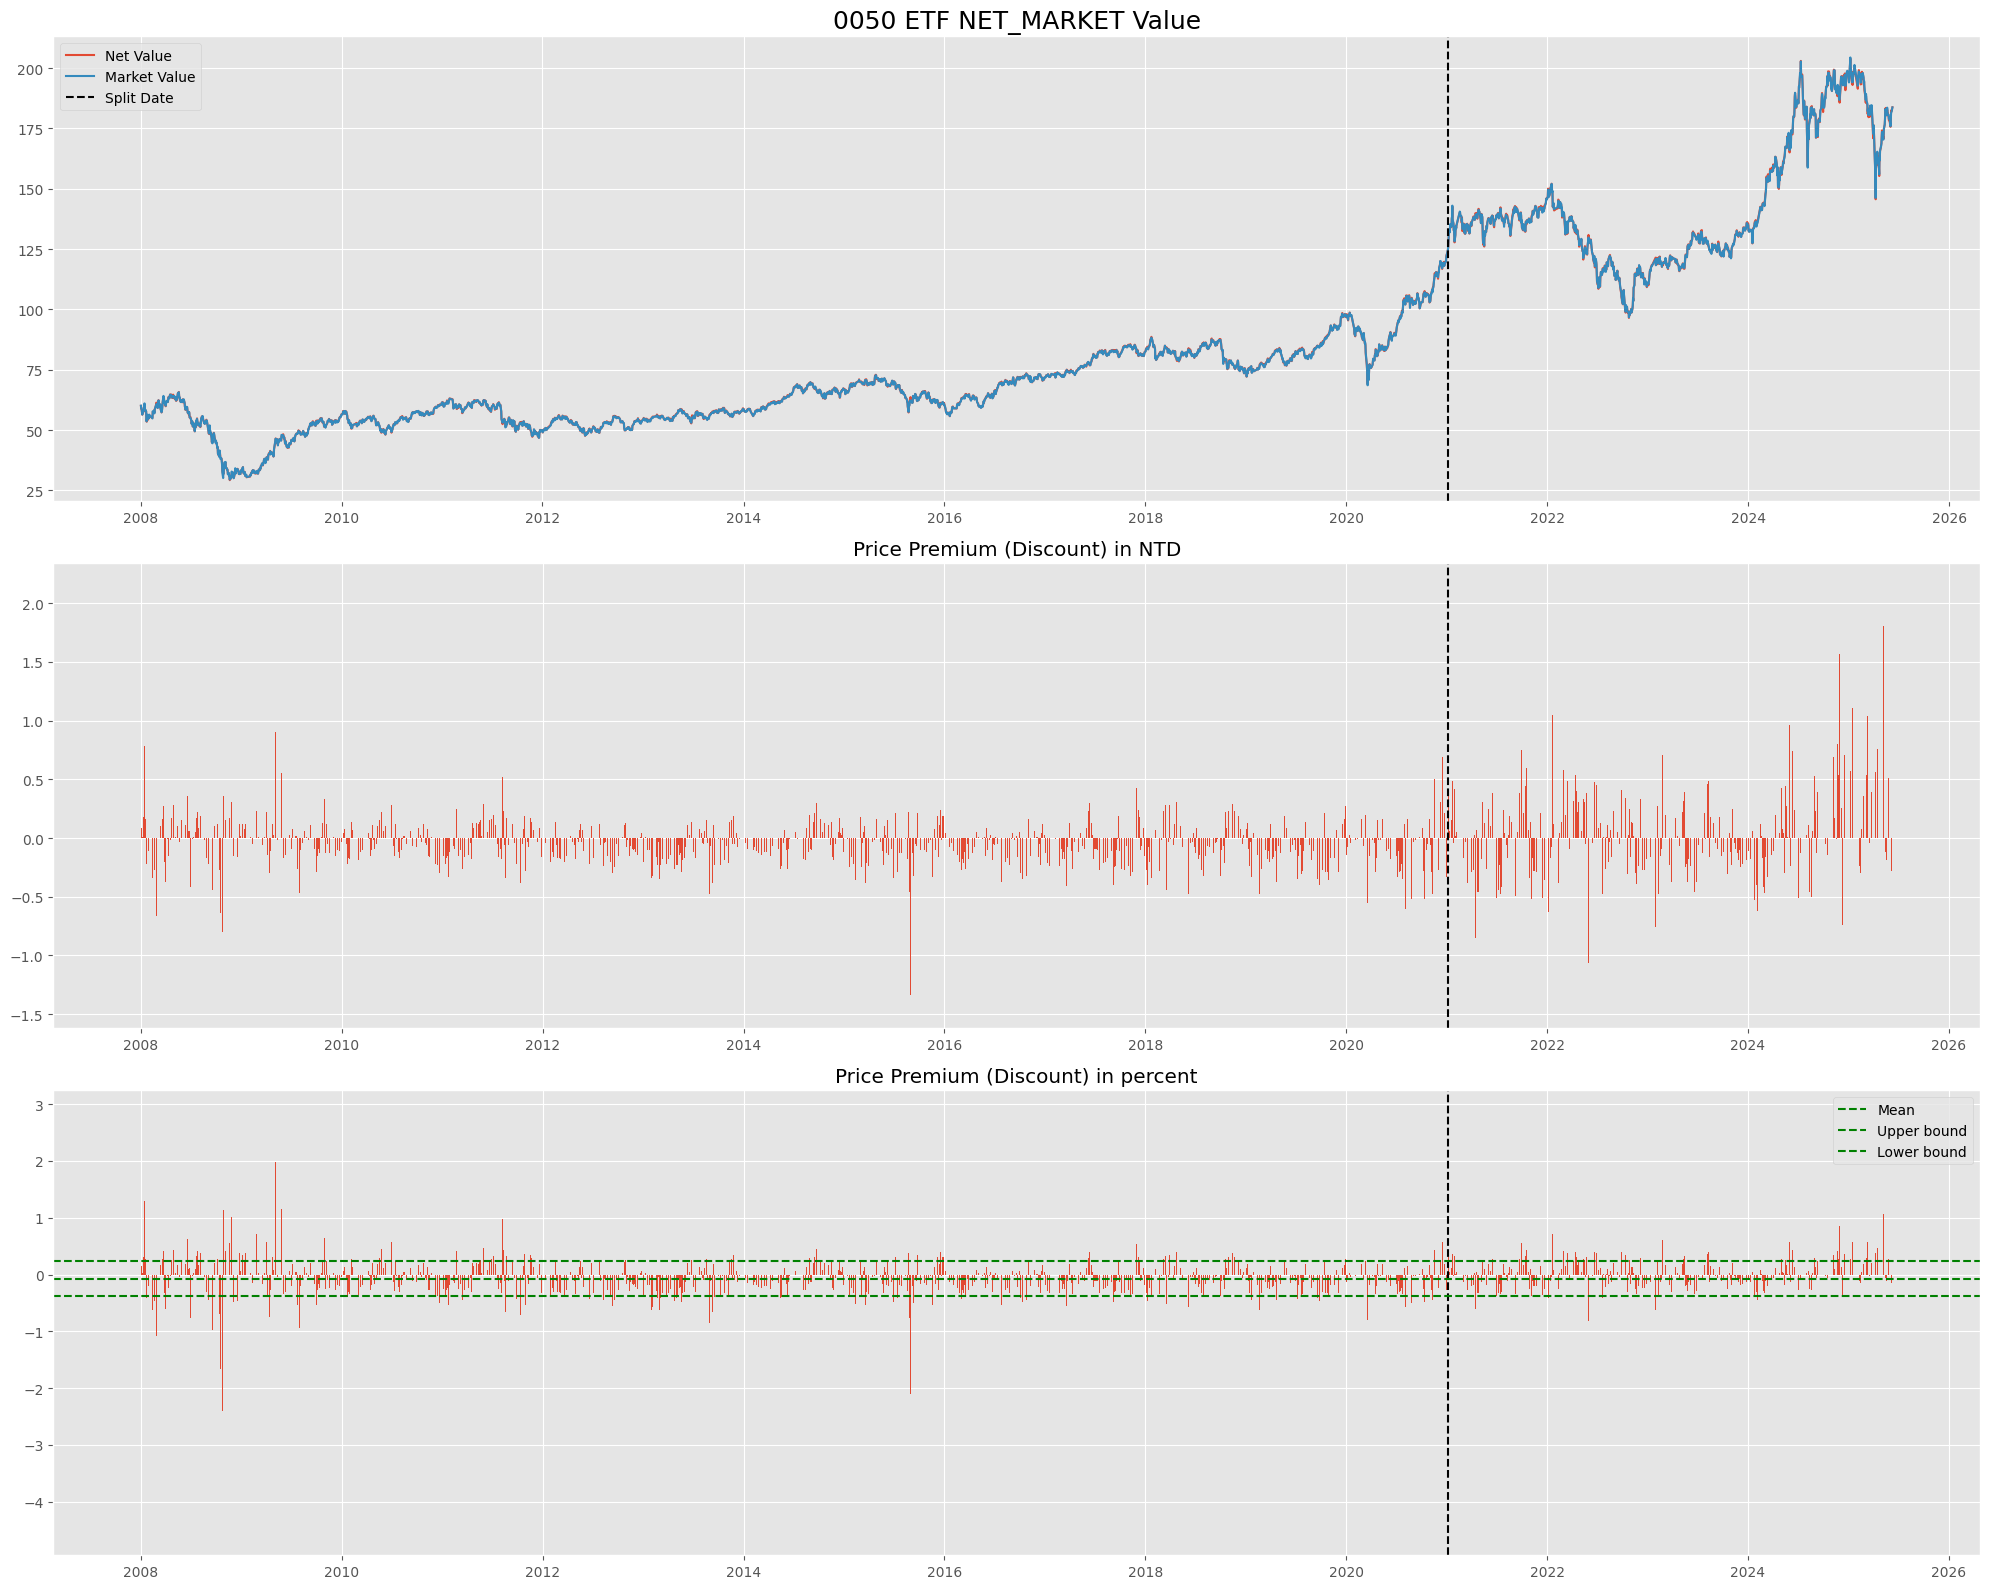

In [21]:
data_use = data[['mdate', 'fld004', 'fld005', 'fld006', 'fld007']].copy()
data_use['NAV_ret'] = data_use['fld004'].pct_change().fillna(0)
data_use['MV_ret'] = data_use['fld005'].pct_change().fillna(0)

split_date = '2021-01-04'
train_data = data_use[data_use['mdate'] < pd.to_datetime(split_date)].copy()
test_data = data_use[data_use['mdate'] >= pd.to_datetime(split_date)].copy()

mean = train_data['fld007'].mean()
std = train_data['fld007'].std()

mpl.rcParams['text.color'] = 'black'  
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 16), sharex=False)

axes[0].plot(data_use['mdate'], data_use['fld004'], label = 'Net Value')
axes[0].plot(data_use['mdate'], data_use['fld005'], label = 'Market Value')
axes[0].axvline(x = pd.to_datetime(split_date), color = 'black', linestyle = '--', label = 'Split Date')
axes[0].set_title('0050 ETF NET_MARKET Value', fontsize=18)
axes[0].legend()

axes[1].bar(data_use['mdate'], data_use['fld006'])
axes[1].axvline(x = pd.to_datetime(split_date), color = 'black', linestyle = '--')
axes[1].set_title(f'Price Premium (Discount) in NTD')


axes[2].bar(data_use['mdate'], data_use['fld007'])
axes[2].axvline(x = pd.to_datetime(split_date), color = 'black', linestyle = '--')
axes[2].axhline(y = mean, color = 'green', label = 'Mean', linestyle = '--')
axes[2].axhline(y = mean + std, color = 'green', label = 'Upper bound', linestyle = '--')
axes[2].axhline(y = mean - std, color = 'green', label = 'Lower bound', linestyle = '--')
axes[2].set_title(f'Price Premium (Discount) in percent')
axes[2].legend()
plt.tight_layout()
plt.show()

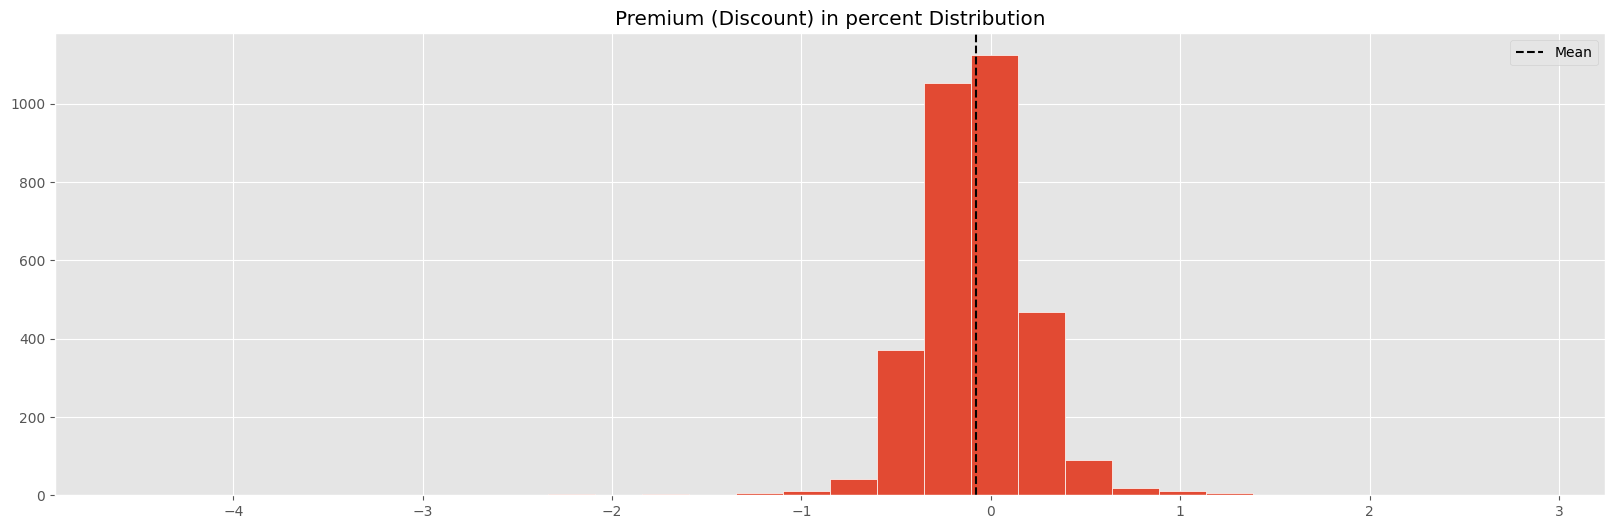

In [22]:
plt.figure(figsize = (20, 6))
plt.hist(train_data['fld007'], bins = 30, edgecolor = 'white')
plt.axvline(x = mean, label = "Mean", color = 'black', linestyle = '--')
plt.title(f'Premium (Discount) in percent Distribution')
plt.legend()
plt.show()

In [40]:
test_data

,mdate,fld004,fld005,fld006,fld007,NAV_ret,MV_ret,signal,b_ret_nav,b_ret_mv,c_ret_nav,c_ret_mv,b_ret,c_ret,b_ret_fee,c_ret_fee,position,trade_id,b_ret_nav_fee,b_ret_mv_fee
None,,,,,,,,,,,,,,,,,,,,
3210,2021-01-04,124.02,124.35,0.33,0.27,0.011747,0.017178,0,0.0,0.0,0.000000,0.0000,0.0,0.00000,0.0,0.000000,NaN,1,0.0,0.0
3211,2021-01-05,125.18,124.60,-0.58,-0.46,0.009353,0.002010,0,0.0,0.0,0.000000,0.0000,0.0,0.00000,0.0,0.000000,0.0,2,0.0,0.0
3212,2021-01-06,125.96,125.95,-0.01,-0.01,0.006231,0.010835,0,0.0,0.0,0.000000,0.0000,0.0,0.00000,0.0,0.000000,0.0,2,0.0,0.0
3213,2021-01-07,128.50,128.90,0.40,0.31,0.020165,0.023422,0,0.0,0.0,0.000000,0.0000,0.0,0.00000,0.0,0.000000,0.0,2,0.0,0.0
3214,2021-01-08,131.30,131.20,-0.10,-0.08,0.021790,0.017843,0,0.0,0.0,0.000000,0.0000,0.0,0.00000,0.0,0.000000,0.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,2025-06-03,176.85,177.15,0.30,0.17,0.006774,0.007106,0,0.0,0.0,0.027182,0.0272,0.0,0.06799,0.0,0.017029,0.0,16,0.0,0.0
4278,2025-06-04,181.93,181.30,-0.63,-0.35,0.028725,0.023426,0,0.0,0.0,0.027182,0.0272,0.0,0.06799,0.0,0.017029,0.0,16,0.0,0.0
4279,2025-06-05,182.49,181.65,-0.84,-0.46,0.003078,0.001931,0,0.0,0.0,0.027182,0.0272,0.0,0.06799,0.0,0.017029,0.0,16,0.0,0.0


In [63]:
sta = 3

test_data['signal'] = np.where(test_data['fld007'] < mean - sta * std, 1,  # fld007 太低
                               np.where(test_data['fld007'] > mean + sta * std, -1, 0))  # fld007 太高

test_data['b_ret_nav'] = np.where(test_data['signal'].shift(1) == 1, test_data['NAV_ret'], 
                                  np.where(test_data['signal'] == -1, -test_data['NAV_ret'], 0))

test_data['b_ret_mv'] = np.where(test_data['signal'].shift(1) == 1, -test_data['MV_ret'], 
                                 np.where(test_data['signal'] == -1, test_data['MV_ret'], 0))

test_data['c_ret_nav'] = (1 + test_data['b_ret_nav']).cumprod() - 1
test_data['c_ret_mv'] = (1 + test_data['b_ret_mv']).cumprod() - 1

test_data['b_ret'] = test_data['b_ret_mv'] + test_data['b_ret_nav']
test_data['c_ret'] = (1 + test_data['b_ret']).cumprod() - 1

cost = (0.001425 * 2 * 0.18 + 0.001)  # 因為計算關係兩邊各收益一半的成本
test_data['b_ret_nav_fee'] = np.where(test_data['signal'].shift(1) == 1, test_data['NAV_ret'] - cost, 
                                  np.where(test_data['signal'] == -1, -test_data['NAV_ret']- cost, 0))

test_data['b_ret_mv_fee'] = np.where(test_data['signal'].shift(1) == 1, -test_data['MV_ret'] - cost, 
                                 np.where(test_data['signal'] == -1, test_data['MV_ret']- cost, 0))

test_data['b_ret_fee'] = test_data['b_ret_mv_fee'] + test_data['b_ret_nav_fee']
test_data['c_ret_fee'] = (1 + test_data['b_ret_fee']).cumprod() - 1

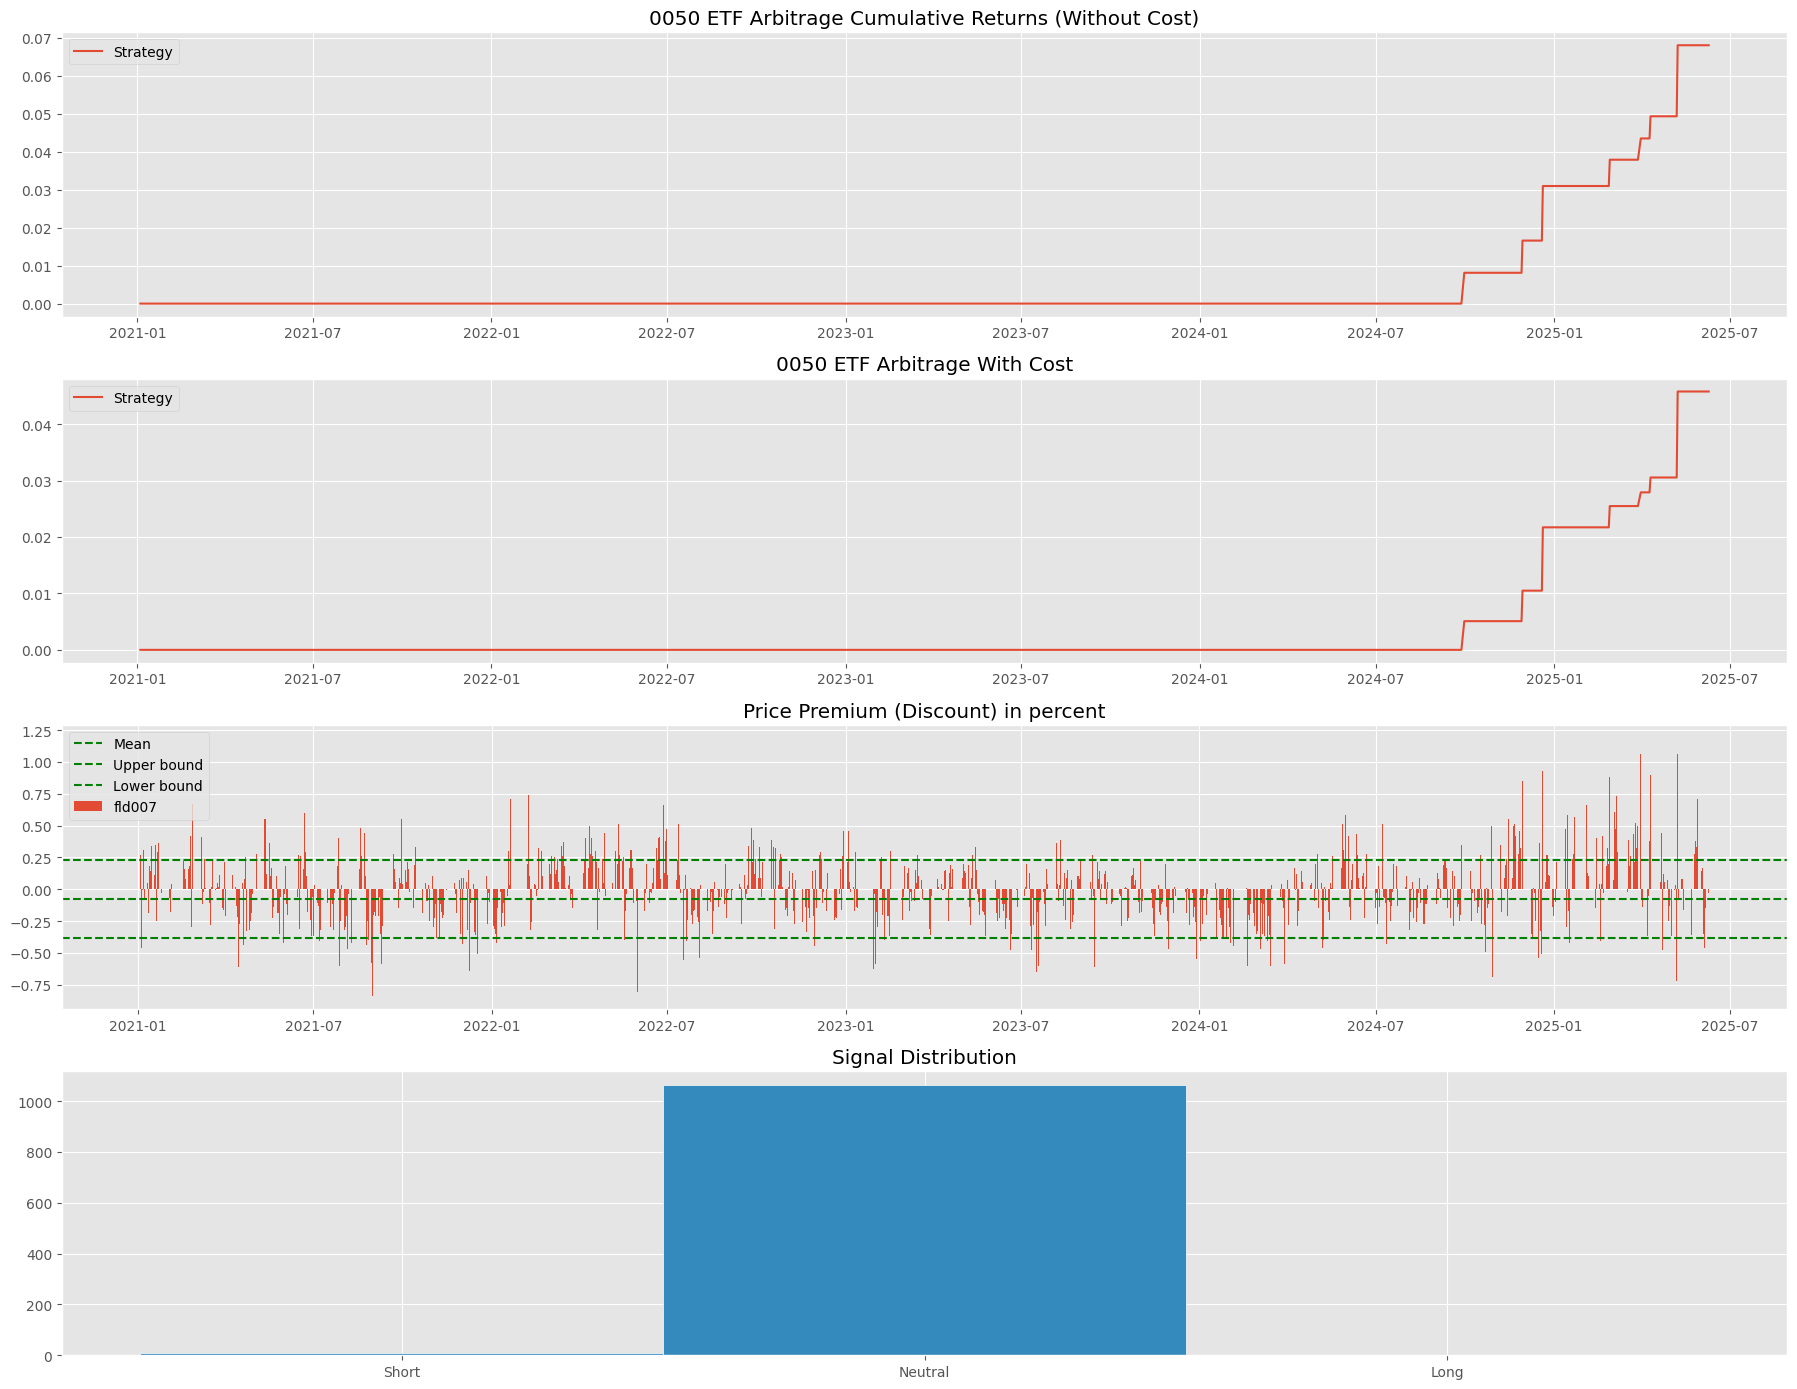

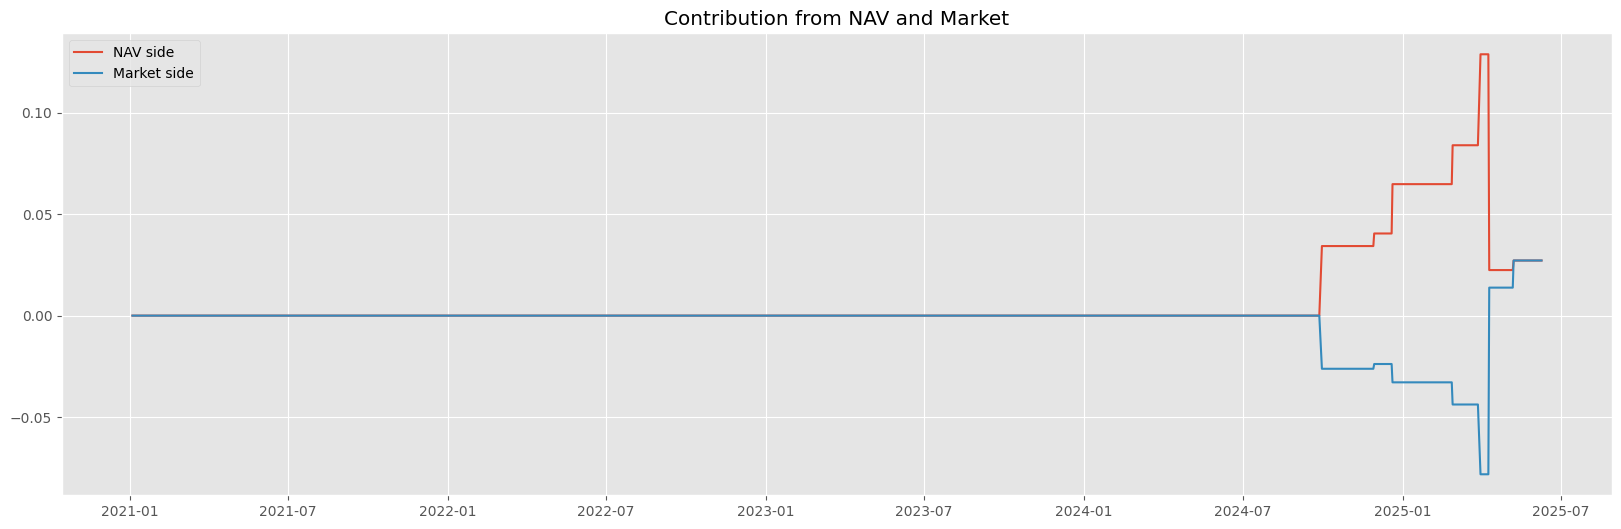

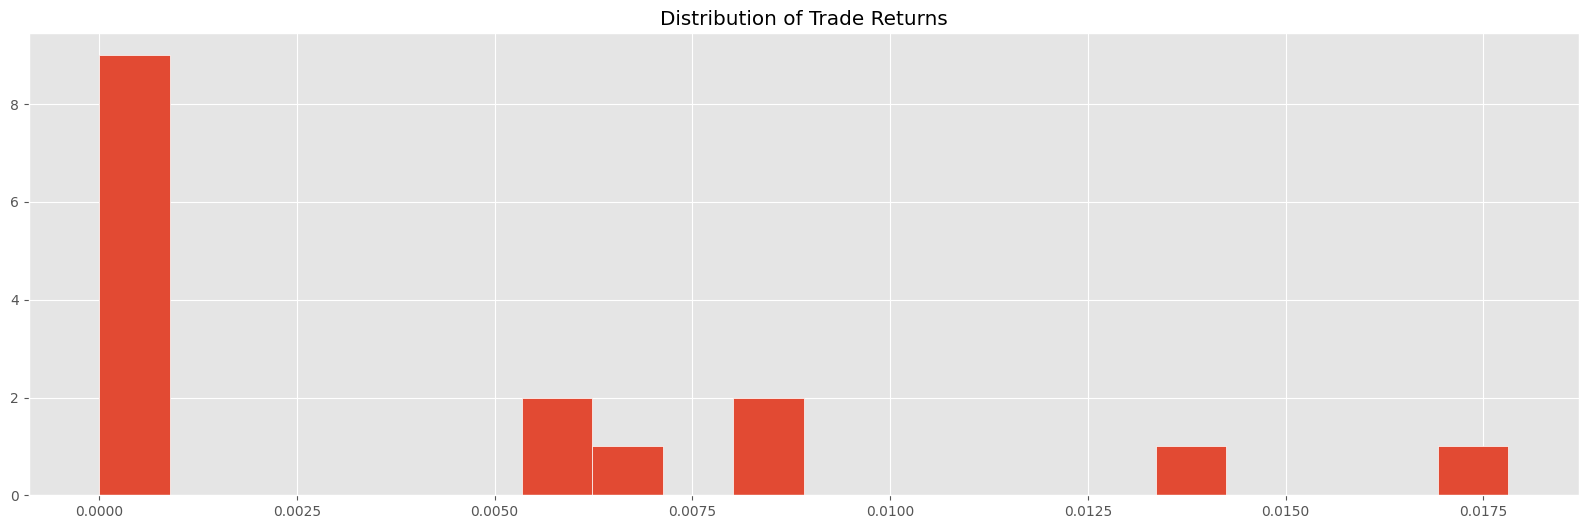

勝率（Win Rate）：100.00%
平均獲利（Avg Win）：0.00945
平均虧損（Avg Loss）：nan
報酬因子（Profit Factor）：nan


In [64]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18, 14), sharex=False)

axes[0].plot(test_data['mdate'], test_data['c_ret'], label='Strategy')
axes[0].set_title(f'0050 ETF Arbitrage Cumulative Returns (Without Cost)')
axes[0].legend()

axes[1].plot(test_data['mdate'], test_data['c_ret_fee'], label='Strategy')
axes[1].set_title(f'0050 ETF Arbitrage With Cost')
axes[1].legend()

axes[2].bar(test_data['mdate'], test_data['fld007'], label='fld007')
axes[2].axhline(y = mean, color = 'green', label = 'Mean', linestyle = '--')
axes[2].axhline(y = mean + std, color = 'green', label = 'Upper bound', linestyle = '--')
axes[2].axhline(y = mean - std, color = 'green', label = 'Lower bound', linestyle = '--')
axes[2].set_title(f'Price Premium (Discount) in percent')
axes[2].legend()

axes[3].hist(test_data['signal'], bins=[-1.5, -0.5, 0.5, 1.5], edgecolor='white', align='mid', color =  '#348ABD')
axes[3].set_xticks([-1, 0, 1])
axes[3].set_xticklabels(['Short', 'Neutral', 'Long'])
axes[3].set_title('Signal Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(test_data['mdate'], test_data['c_ret_nav'], label='NAV side')
plt.plot(test_data['mdate'], test_data['c_ret_mv'], label='Market side')
plt.legend()
plt.title('Contribution from NAV and Market')
plt.show()

test_data['position'] = test_data['signal'].shift(1)
test_data['trade_id'] = (test_data['position'] != test_data['position'].shift()).cumsum()

grouped = test_data.groupby('trade_id')
trade_summary = grouped.agg({
    'b_ret': 'sum',
    'position': 'first',
    'mdate': ['first', 'last', 'count']
})
# 攤平欄位名稱
trade_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in trade_summary.columns]
# 重設索引
trade_summary = trade_summary.reset_index()

plt.figure(figsize=(20, 6))
plt.hist(trade_summary['b_ret_sum'], bins=20, edgecolor='white')
plt.title("Distribution of Trade Returns")
plt.show()
trades_with_result = trade_summary[trade_summary['b_ret_sum'] != 0]
win_rate = (trades_with_result['b_ret_sum'] > 0).mean()
avg_win = trade_summary[trade_summary['b_ret_sum'] > 0]['b_ret_sum'].mean()
avg_loss = trade_summary[trade_summary['b_ret_sum'] < 0]['b_ret_sum'].mean()
profit_factor = abs(avg_win / avg_loss)

print(f"勝率（Win Rate）：{win_rate:.2%}")
print(f"平均獲利（Avg Win）：{avg_win:.5f}")
print(f"平均虧損（Avg Loss）：{avg_loss:.5f}")
print(f"報酬因子（Profit Factor）：{profit_factor:.2f}")

In [59]:
import datetime

today = datetime.date.today()
past_30_days = today - datetime.timedelta(days=30)

print("今天日期：", today)
print("過去30天的日期：", past_30_days)

今天日期： 2025-06-19
過去30天的日期： 2025-05-20
